# Import necessary libraries

In [1]:
from adversarial.imageclassification.pgd import PGD
from adversarial.imageclassification.attack import run_attack,plot_adversarial_sample
from explanation.saliency.saliency_zoo import agi,run_explanation
from mutants.image_classification import LabelError,NoisePerturb
from models.densenet121_cifar10 import ComposedModel as DenseNet121
from models.googlenet_cifar10 import ComposedModel as GoogleNet
from models.inception_v3_cifar10 import ComposedModel as InceptionV3
from models.mobilenet_v2_cifar10 import ComposedModel as MobileNetV2
from models.resnet50_cifar10 import ComposedModel as ResNet50
from models.vgg16_bn_cifar10 import ComposedModel as VGG16_bn
from datasets.cifar10 import load_dataset,BATCH_SIZE
from torch.utils.data import DataLoader
from pruning.taylor import Taylor
from indicator.builtin import metric
from utils import check_device
device = check_device()

# Initialize the model

In [2]:
densenet121 = DenseNet121().get_model()
googlenet = GoogleNet().get_model()
inception_v3 = InceptionV3().get_model()
mobilenet_v2 = MobileNetV2().get_model()
resnet50 = ResNet50().get_model()
vgg16_bn = VGG16_bn().get_model()

# Load the data

In [3]:
train_dataset, test_dataset = load_dataset()
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


# Mutate the data

#### LabelError use p = 0.1

In [4]:
labelerror = LabelError(0.1,num_classes=10)
labelerror_dataloader = DataLoader(test_dataloader.dataset,batch_size=BATCH_SIZE,shuffle=False,collate_fn=labelerror)

In [5]:
# metric labelerror data
metrics_densenet121, class_report_densenet121 = metric(densenet121,labelerror_dataloader,num_classes=10)
metrics_googlenet, class_report_googlenet = metric(googlenet,labelerror_dataloader,num_classes=10)
metrics_inception_v3, class_report_inception_v3 = metric(inception_v3,labelerror_dataloader,num_classes=10)
metrics_mobilenet_v2, class_report_mobilenet_v2 = metric(mobilenet_v2,labelerror_dataloader,num_classes=10)
metrics_resnet50, class_report_resnet50 = metric(resnet50,labelerror_dataloader,num_classes=10)
metrics_vgg16_bn, class_report_vgg16_bn = metric(vgg16_bn,labelerror_dataloader,num_classes=10)

In [6]:
metrics_resnet50

,Metric,Value
0,Accuracy,0.8400
1,Loss,1.6353
2,TPR,0.8403
3,TNR,0.9822
4,PPV,0.8401
5,NPV,0.9822
6,FPR,0.0178
7,FNR,0.1597
8,FDR,0.1599
9,ROC_AUC,0.9388


In [7]:
class_report_resnet50

,precision,recall,f1-score,support
0,0.8370,0.8436,0.8403,1004.00
1,0.8588,0.8649,0.8618,999.00
2,0.8463,0.8186,0.8322,1009.00
3,0.7986,0.7655,0.7817,1015.00
4,0.8327,0.8512,0.8418,988.00
5,0.7981,0.8107,0.8043,1014.00
6,0.8567,0.8619,0.8593,985.00
7,0.8653,0.8671,0.8662,978.00
8,0.8488,0.8573,0.8530,1002.00
9,0.8584,0.8618,0.8601,1006.00


#### Noiseperturb use std = 0.05

In [8]:
noiseperturb = NoisePerturb(0.05)
noiseperturb_dataloader = DataLoader(test_dataloader.dataset,batch_size=BATCH_SIZE,shuffle=False,collate_fn=noiseperturb)

In [9]:
# metric noiseperturb data
metrics_densenet121, class_report_densenet121 = metric(densenet121,noiseperturb_dataloader,num_classes=10)
metrics_googlenet, class_report_googlenet = metric(googlenet,noiseperturb_dataloader,num_classes=10)
metrics_inception_v3, class_report_inception_v3 = metric(inception_v3,noiseperturb_dataloader,num_classes=10)
metrics_mobilenet_v2, class_report_mobilenet_v2 = metric(mobilenet_v2,noiseperturb_dataloader,num_classes=10)
metrics_resnet50, class_report_resnet50 = metric(resnet50,noiseperturb_dataloader,num_classes=10)
metrics_vgg16_bn, class_report_vgg16_bn = metric(vgg16_bn,noiseperturb_dataloader,num_classes=10)

In [10]:
metrics_resnet50

,Metric,Value
0,Accuracy,0.7849
1,Loss,1.6926
2,TPR,0.7849
3,TNR,0.9761
4,PPV,0.8320
5,NPV,0.9766
6,FPR,0.0239
7,FNR,0.2151
8,FDR,0.1680
9,ROC_AUC,0.9638


In [11]:
class_report_resnet50

,precision,recall,f1-score,support
0,0.9483,0.7330,0.8268,1000.0000
1,0.9630,0.8840,0.9218,1000.0000
2,0.7116,0.7920,0.7496,1000.0000
3,0.8161,0.4880,0.6108,1000.0000
4,0.7202,0.8750,0.7901,1000.0000
5,0.9267,0.5690,0.7051,1000.0000
6,0.4927,0.9790,0.6555,1000.0000
7,0.9728,0.7520,0.8483,1000.0000
8,0.8806,0.8700,0.8753,1000.0000
9,0.8883,0.9070,0.8976,1000.0000


# Pruing

#### pruning model use taylor

In [18]:
taylor = Taylor(pruning_ratio=0.35)

In [19]:
pruned_densenet121 = taylor(densenet121,train_dataloader)
pruned_googlenet = taylor(googlenet,train_dataloader)
pruned_inception_v3 = taylor(inception_v3,train_dataloader)
pruned_mobilenet_v2 = taylor(mobilenet_v2,train_dataloader)
pruned_resnet50 = taylor(resnet50,train_dataloader)
pruned_vgg16_bn = taylor(vgg16_bn,train_dataloader)

  0%|          | 1/391 [00:00<00:53,  7.24it/s]

100%|██████████| 30/30 [00:00<00:00, 4369.37it/s]


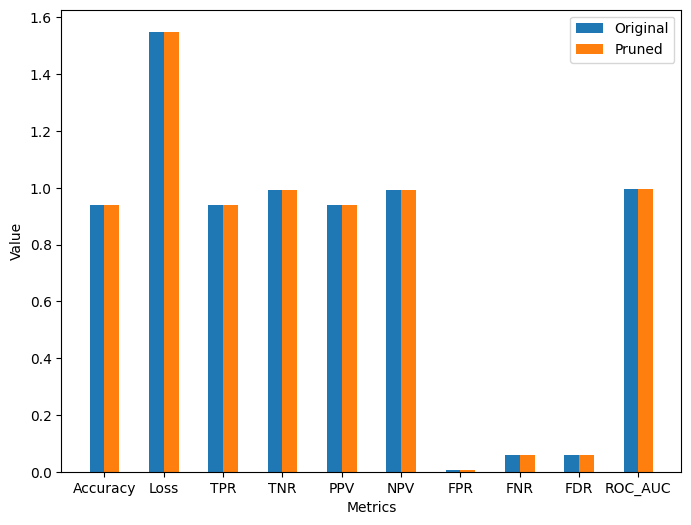

In [28]:
import matplotlib.pyplot as plt
import numpy as np
def analyze_pruning(model,pruned_model,test_dataloader,num_classes=10):
    r"""
    Analyze the effect of pruning on the model.
    Arguments:
        model: The original model.
        pruned_model: The pruned model.
        test_dataloader: The dataloader of test dataset.
        num_classes: The number of classes.
    """
    metrics, _ = metric(model,test_dataloader,num_classes=10)
    metrics_pruned, _ = metric(pruned_model,test_dataloader,num_classes=10)
    # covert two metrics to list and plot bar chart
    x_labels = metrics.iloc[:,0].values
    metrics = metrics.iloc[:,1].values
    metrics_pruned =  metrics_pruned.iloc[:,1].values
    width = 0.25
    plt.figure(figsize=(8,6))
    plt.bar(np.arange(len(metrics))-width/2,metrics,width=width,label='Original')
    plt.bar(np.arange(len(metrics))+width/2,metrics_pruned,width=width,label='Pruned')
    plt.xticks(range(len(metrics)),x_labels)
    plt.xlabel('Metrics')
    plt.ylabel('Value')
    plt.legend()
    plt.show()
    
analyze_pruning(densenet121,pruned_densenet121,test_dataloader)

In [16]:
metrics, class_report = metric(pruned_model,test_dataloader,num_classes=100)

# Adversarial Attack

In [12]:
adv_data,original_data = run_attack(model,PGD,test_dataloader,kwargs={'eps':8/255,'alpha':1/255,'steps':10,'random_start':True})

Succeed rate: 0.9986000061035156


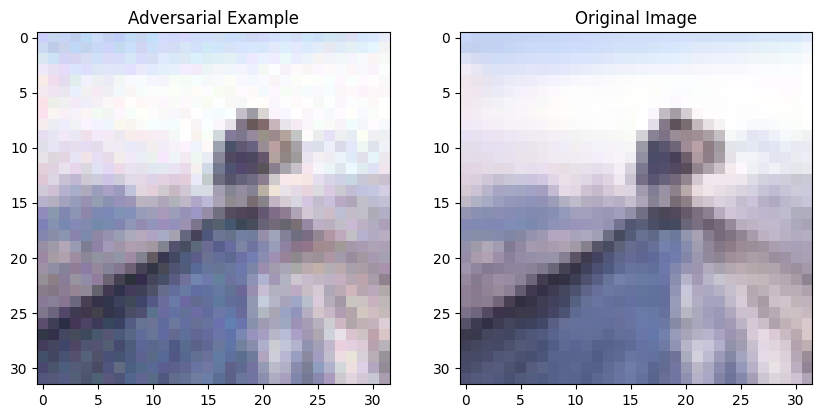

In [13]:
plot_adversarial_sample(adv_data[0],original_data[0])

# Model Explaination

In [14]:
attributions,all_data = run_explanation(model,test_dataloader,agi,kwargs={'topk':2,'num_classes':100})

100%|██████████| 79/79 [05:51<00:00,  4.45s/it]


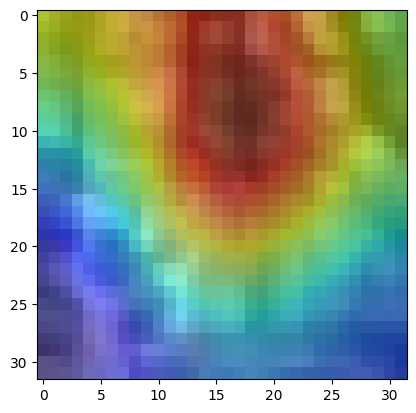

In [15]:
from plot import plot
plot(attributions[1:2],test_dataset[1][0].unsqueeze(0))